<font size="5">Import Libraries</font>

In [80]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage

<font size="5">Read Images</font>

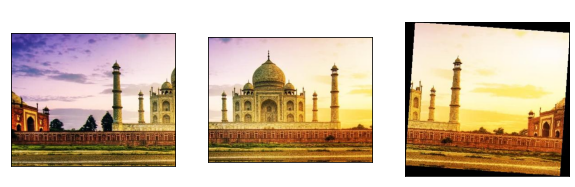

In [81]:
img_1a = cv2.imread("./1a.jpg")
img_1b = cv2.imread("./1b.jpg")
img_1c = cv2.imread("./1c.jpg")

img_1a = cv2.cvtColor(img_1a, cv2.COLOR_BGR2RGB)
img_1b = cv2.cvtColor(img_1b, cv2.COLOR_BGR2RGB)
img_1c = cv2.cvtColor(img_1c, cv2.COLOR_BGR2RGB)

plt.figure(0, (10, 8))

plt.subplot(1, 3, 1)
plt.imshow(img_1a)
title1 = plt.title('Image 1a Original')
plt.setp(title1, color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(img_1b)
title1 = plt.title('Image 1b Original')
plt.setp(title1, color='white')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(img_1c)
title1 = plt.title('Image 1c Original')
plt.setp(title1, color='white')
plt.xticks([])
plt.yticks([])

plt.show()

<font size="5">Rotate & Crop Image 1C</font>

In [82]:
def crop_around_center(image, width, height):
    image_size = (image.shape[1], image.shape[0])
    image_center = (int(image_size[0] * 0.5), int(image_size[1] * 0.5))

    if(width > image_size[0]):
        width = image_size[0]

    if(height > image_size[1]):
        height = image_size[1]

    x1 = int(image_center[0] - width * 0.5)
    x2 = int(image_center[0] + width * 0.5)
    y1 = int(image_center[1] - height * 0.5)
    y2 = int(image_center[1] + height * 0.5)

    return image[y1:y2, x1:x2]

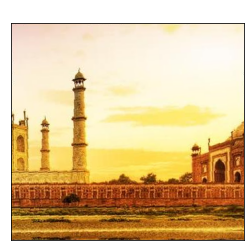

In [83]:
height, width, _ = img_1c.shape
angle = 4
img_1c = ndimage.rotate(img_1c, angle)
img_1c = crop_around_center(img_1c, width-25, height-25)

plt.imshow(img_1c)
title = plt.title("Image 1C after rotation and cropping")
plt.setp(title, color="white")
plt.xticks([])
plt.yticks([])
plt.show()

<font size="5">Stitch All the Images</font>

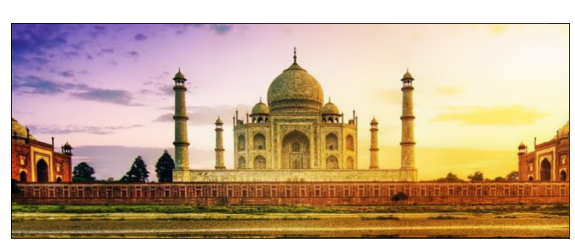

In [84]:
stitcher = cv2.createStitcher()
_, result = stitcher.stitch([img_1a, img_1b, img_1c])

plt.figure(1, (10, 10))
plt.imshow(result)
title = plt.title("Result")
plt.setp(title, color="white")
plt.xticks([])
plt.yticks([])
plt.show()